In [29]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [44]:
# Building a Test Portfolio
symbols = [
    'AAPL',
    'NFLX',
    'AMZN',
    'META',
    'GOOGL',
    'BTC',
    'LTC',
    'AU',
    'GFI',
]
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()
print(portfolio_returns)

[*********************100%***********************]  9 of 9 completed
                AAPL      AMZN        AU       BTC       GFI     GOOGL  \
Date                                                                     
2020-10-02 -0.032280 -0.029883 -0.016263  0.000000 -0.022581 -0.021708   
2020-10-05  0.030791  0.023744  0.001922 -0.000050  0.015677  0.018707   
2020-10-06 -0.028670 -0.031020 -0.028396  0.000350 -0.035743 -0.021452   
2020-10-07  0.016967  0.030881  0.006714 -0.001100 -0.000842  0.005596   
2020-10-08 -0.000956 -0.001608  0.040800  0.000751  0.035413  0.016647   
...              ...       ...       ...       ...       ...       ...   
2022-11-22  0.014661  0.008003  0.055977  0.001385  0.015038  0.015167   
2022-11-23  0.005926  0.009979  0.010491  0.003040  0.024074  0.014529   
2022-11-25 -0.019594 -0.007649 -0.007650  0.000378 -0.013562 -0.010156   
2022-11-28 -0.026264  0.005781 -0.044053  0.000334 -0.024748 -0.014467   
2022-11-29 -0.021148 -0.016285  0.025922 -0

In [45]:
# Using sklearn to fit a PCA model and get components
pca = PCA(n_components=3)
pca.fit(portfolio_returns)

PCA(n_components=3)

In [46]:
# Grabbing explained variance and components
pct = pca.explained_variance_ratio_
print(pct)
pca_components = pca.components_
print(pca_components)

[0.43790568 0.29433549 0.09556198]
[[ 2.58569284e-01  3.53463976e-01  3.67946356e-01  1.19713084e-02
   4.07939963e-01  2.77192841e-01  6.04329088e-02  4.53641287e-01
   4.69024383e-01]
 [ 1.56924435e-01  2.22368001e-01 -5.18616124e-01 -5.33099119e-03
  -6.54480335e-01  1.63271822e-01  7.15020856e-03  3.01102454e-01
   3.33496746e-01]
 [ 2.27439095e-01  1.57652270e-01 -6.39375732e-02 -1.87258215e-04
   1.59326264e-02  2.80001310e-01  1.58425801e-01  4.19650137e-01
  -7.99668442e-01]]


(0.0, 100.0)

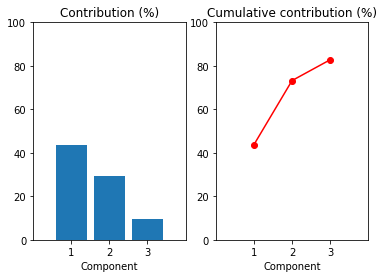

In [47]:
# Charting PCA
cum_pct = np.cumsum(pct)
x=np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct*100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct*100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [48]:
# Forces that move stock prices isolated as principal components
# Forces include market, interest rates, and pandemic concerns
X = np.asarray(portfolio_returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"],
    index=portfolio_returns.index,
    data=factor_returns
)
factor_returns.head()

,f1,f2,f3
Date,,,
2020-10-02,-0.072145,-0.014924,0.011963
2020-10-05,0.052282,0.018911,-0.006813
2020-10-06,-0.073437,0.006877,-0.004296
2020-10-07,0.044815,0.025882,-0.036267
2020-10-08,0.041578,-0.037233,0.018011


<AxesSubplot:>

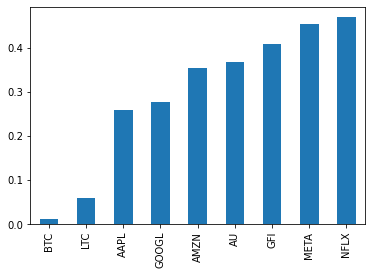

In [49]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"],
    columns=portfolio_returns.columns,
    data=pca_components
).T

factor_exposures.f1.sort_values().plot.bar()

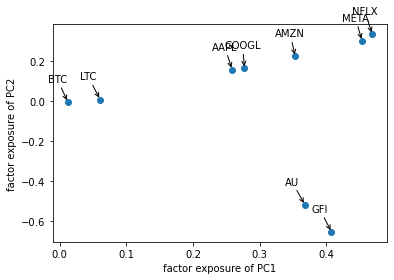

In [51]:
# Scatterplot Visualization
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y, in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20,20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    );